In [103]:
import numpy as np
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression

442 10
(442,)


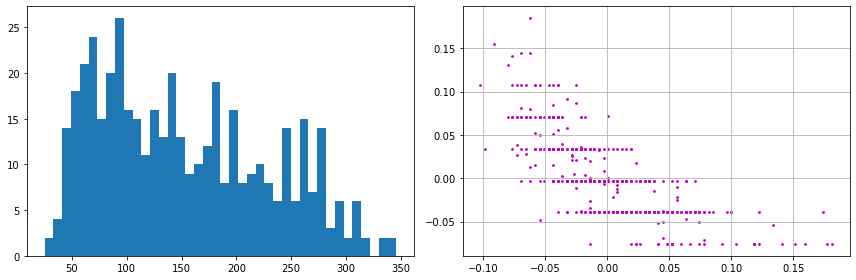

In [104]:
# Linear Least Squares Regression


# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].hist(t, bins=40)
ax[1].scatter(X[:,6], X[:,7], c='m', s=3)
ax[1].grid(True)
plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

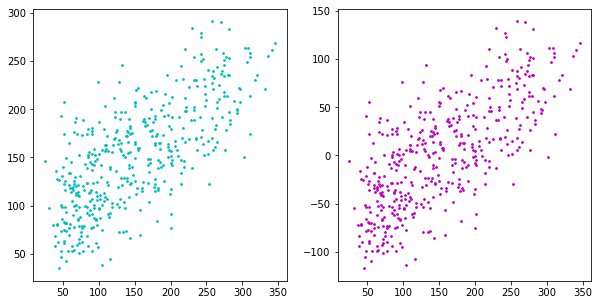

In [105]:
# Linear regression using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-inverse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
# Plot predictions to check if they look the same!
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[1].scatter(t, th2, c='m', s=3)

In [106]:
# root mean square for linear model
mse = sklearn.metrics.mean_squared_error(t, th1)

rmse = math.sqrt(mse)

print(rmse)

53.47607314274362


In [107]:
# root mean square for pseudo inverse method
mse = sklearn.metrics.mean_squared_error(t, th2)

rmse = math.sqrt(mse)

print(rmse)

161.25844908813414


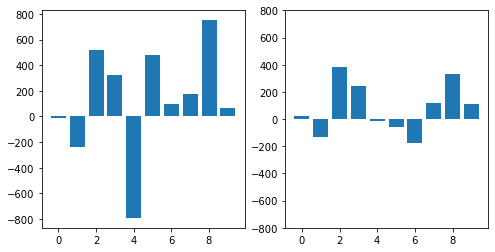

In [108]:
# Regularization
gamma = 0.5
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)
ax[1].set_ylim([-800,800])
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")


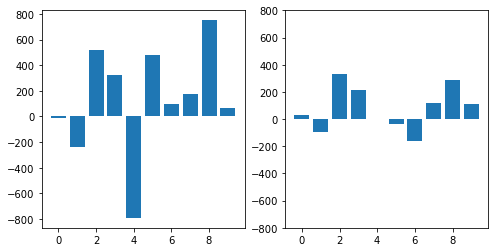

In [109]:
gamma = 0.8
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)
ax[1].set_ylim([-800,800])
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")


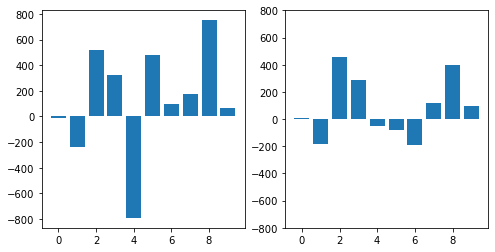

In [110]:
gamma = 0.2
wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)), wR)
ax[1].set_ylim([-800,800])
plt.savefig("LeastSquaresAndRegularizedWeights.jpg")

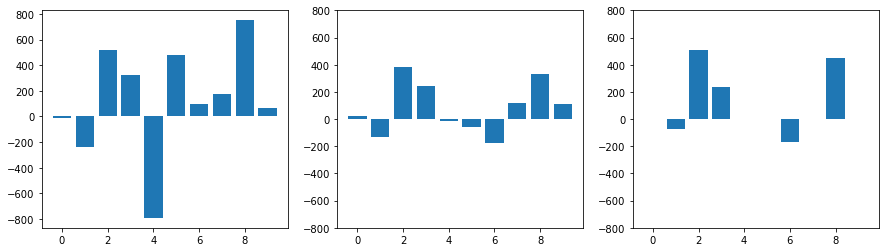

In [94]:
from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
ll.fit(X, t)
th_lasso = ll.predict(X)
w_lasso=ll.coef_
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
ax[0].bar(np.arange(len(w)), w)
ax[1].bar(np.arange(len(wR)),wR)
ax[1].set_ylim([-800,800])
ax[2].bar(np.arange(len(w_lasso)),w_lasso)
ax[2].set_ylim([-800,800])
# ax[1].bar(np.arrange(len(wR)),wR)
# ax[2].bar(np.arrange(len(th_lasso)),th_lasso)
#
#...
#
plt.savefig("solutions.png")

In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))

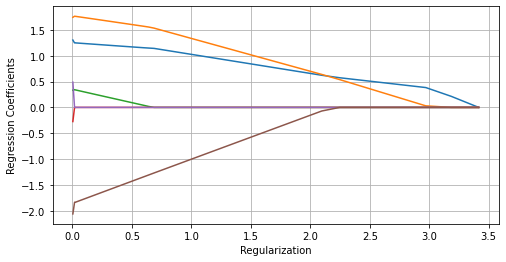

In [101]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
    ax.grid(True)
    ax.set_xlabel("Regularization")
    ax.set_ylabel("Regression Coefficients")


(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


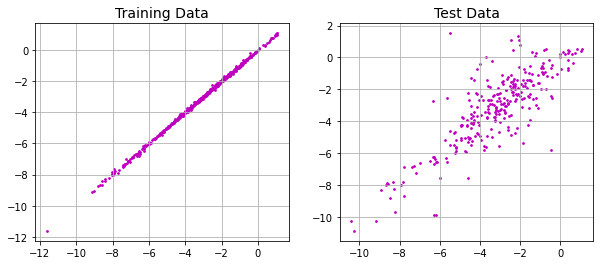

In [19]:
sol = pd.read_excel("./downloads/Husskonen_Solubility_Features.xlsx", verbose=False).dropna()
print(sol.shape)
colnames = sol.columns
print(colnames)
t = sol["LogS.M."].to_numpy()
X = sol[colnames[5:len(colnames)-1]].to_numpy()
N, p = X.shape
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
# Regularized regression
#
gamma = 0.1
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w
th_test = X_test @ w
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)
ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)
plt.savefig("SolubilityPrediction.jpg")
# Over to you for implementing Lasso

(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.93919513264075, tolerance: 0.2696257881441718
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.50621216010744, tolerance: 0.11023415871428573
  model = cd_fast.enet_coordinate_descent(


ValueError: x and y must be the same size

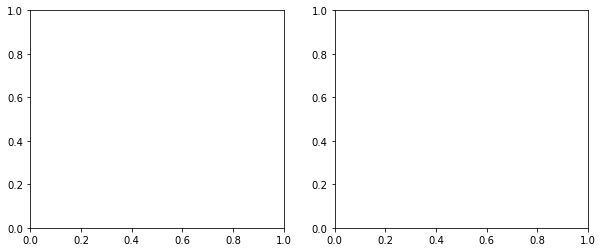

In [112]:
sol = pd.read_excel("./downloads/Husskonen_Solubility_Features.xlsx", verbose=False).dropna()
print(sol.shape)
colnames = sol.columns
print(colnames)
t = sol["LogS.M."].to_numpy()
X = sol[colnames[5:len(colnames)-1]].to_numpy()
N, p = X.shape
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

from sklearn.linear_model import Lasso
ll = Lasso(alpha=0.2)
l1=ll.fit(X_train, t_train)
w_lasso1=l1.coef_
l2=ll.fit(X_test, t_test)
w_lasso2=l2.coef_
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, w_lasso1, c='m', s=3)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)
ax[1].scatter(t_test, w_lasso2, c='o', s=3)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)
plt.savefig("SolubilityPrediction.jpg")